In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import graphviz

%matplotlib inline

7. Attribute Information:
   -- Only 14 used
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)

In [338]:
df = pd.read_csv('data/processed.cleveland.data', header=None )

In [339]:
df.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

In [340]:
df.shape

(303, 14)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [342]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [343]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

- unique 갯수를 보니 범주화 해야할 것 같은 변수들이 보인다

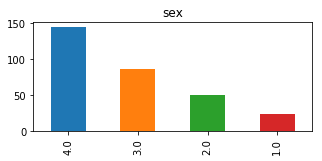

In [344]:
df.cp.value_counts().plot.bar(title="sex", figsize=(5,2))

- 범주의 느낌이 난다

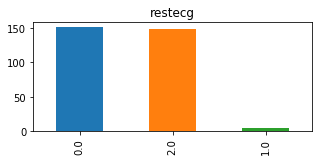

In [345]:
df.restecg.value_counts().plot.bar(title="restecg", figsize=(5,2))

- 요거는 범주 인듯 하다

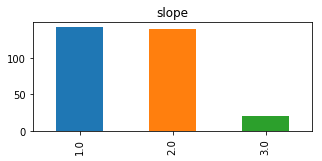

In [346]:
df.slope.value_counts().plot.bar(title="slope", figsize=(5,2))

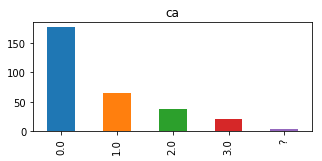

In [347]:
df.ca.value_counts().plot.bar(title="ca", figsize=(5,2))

### - ? 물음표가 있다

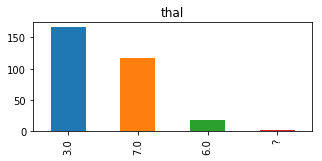

In [348]:
df.thal.value_counts().plot.bar(title="thal", figsize=(5,2))

### - ? 물음표가 있다

## - UCI의 Description 확인결과 sex, restecg, slope, ca, thal 5개 변수는 범주형.
- https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
- 전처리가 필요하다

In [349]:
df.ca.nunique(), df.thal.nunique()

(5, 4)

In [350]:
df.ca.unique(), df.thal.unique()

(array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object),
 array(['6.0', '3.0', '7.0', '?'], dtype=object))

- 근데 두 컬럼의 끝에 물음표가 들어있다

In [351]:
len(df[df["ca"] == "?"]), len(df[df["thal"] == "?"])

(4, 2)

- 각각 4줄, 2줄. 지워버리자

In [352]:
df.shape

(303, 14)

In [353]:
df = df[df["ca"] != "?"]
df = df[df["thal"] != "?"]

In [354]:
df.shape

(297, 14)

In [355]:
df.ca.unique(), df.thal.unique()

(array(['0.0', '3.0', '2.0', '1.0'], dtype=object),
 array(['6.0', '3.0', '7.0'], dtype=object))

- 다 지워졌다.

In [356]:
data = pd.get_dummies(df, columns=["sex", "restecg", "slope", "ca", "thal"])

In [357]:
data.describe()

,age,cp,trestbps,chol,fbs,thalach,exang,oldpeak,num,sex_0.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,3.158249,131.693603,247.350168,0.144781,149.599327,0.326599,1.055556,0.946128,0.323232,...,0.468013,0.461279,0.070707,0.585859,0.218855,0.127946,0.067340,0.552189,0.060606,0.387205
std,9.049736,0.964859,17.762806,51.997583,0.352474,22.941562,0.469761,1.166123,1.234551,0.468500,...,0.499818,0.499340,0.256768,0.493404,0.414168,0.334594,0.251033,0.498108,0.239009,0.487933
min,29.000000,1.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,3.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,3.000000,130.000000,243.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,4.000000,140.000000,276.000000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,4.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [358]:
data_x = df.drop(columns="num")
data_y = df["num"]
data_x.shape, data_y.shape

((297, 13), (297,))

In [359]:
data_np_x = np.array(data_x)
data_np_y = np.array(data_y)
data_np_x.shape, data_np_y.shape

((297, 13), (297,))

In [360]:
train_x, test_x, train_y, test_y = train_test_split(data_np_x, data_np_y, test_size=0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((237, 13), (60, 13), (237,), (60,))

In [361]:
model = DecisionTreeClassifier().fit(train_x, train_y)
model.score(train_x, train_y), model.score(test_x, test_y)

(1.0, 0.4666666666666667)

- DecisionTree 의 성능은 썩 좋지 못하다

In [362]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/user/Documents/graphviz-2.38/release/bin/'

In [363]:
export_graphviz(model, out_file='heart.dot',feature_names=data_x.columns)

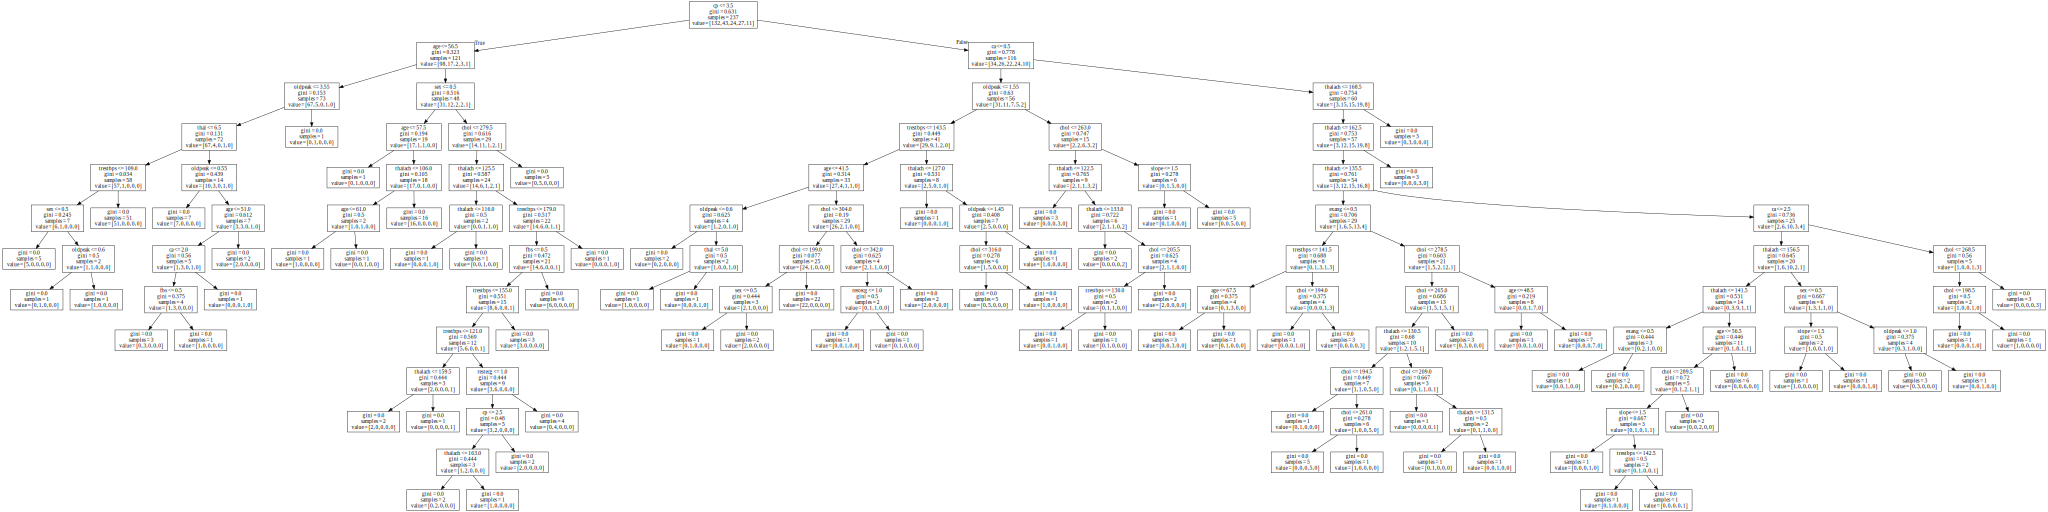

In [364]:
with open('heart.dot') as f:
    graph = f.read()
display(graphviz.Source(graph))

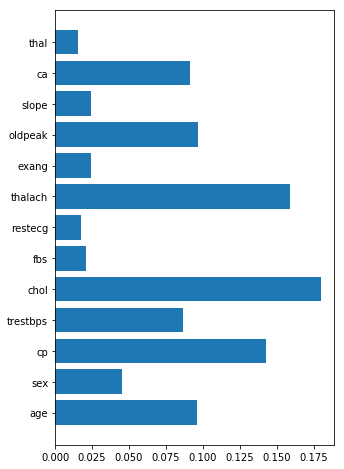

In [365]:
f = plt.figure(figsize=(5,8))
f = plt.barh(range(train_x.shape[1]), model.feature_importances_)
f = plt.yticks(range(train_x.shape[1]), data_x.columns)

# - 가장 큰 영향을 미치는 속성들 : 
### thalach, chol, cp, age 등등

##### 다른 모델도 다 돌려보자

In [366]:
def test_model(model, train_x, test_x, train_y, test_y):
    model.fit(train_x, train_y)
    print('Performance:{}, {}'.format(model.score(train_x, train_y), model.score(test_x, test_y)))
    pass

In [367]:
test_model(KNeighborsClassifier(), train_x, test_x, train_y, test_y)
test_model(LinearRegression(), train_x, test_x, train_y, test_y)
test_model(LogisticRegression(), train_x, test_x, train_y, test_y)
test_model(RandomForestClassifier(), train_x, test_x, train_y, test_y)
test_model(LinearSVC(), train_x, test_x, train_y, test_y)
test_model(SVC(), train_x, test_x, train_y, test_y)

Performance:0.5991561181434599, 0.45
Performance:0.602770620942036, 0.39630115099008795
Performance:0.6919831223628692, 0.55
Performance:0.9704641350210971, 0.5333333333333333
Performance:0.620253164556962, 0.48333333333333334
Performance:1.0, 0.4666666666666667


### 그나마 랜덤 포레스트가 다른 모델에 비해 조금 더 성능이 나온다
- Performance:0.9704641350210971, 0.5333333333333333